# **1. Eksplorasi Data**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

## **1.1 Memuat Data**

In [27]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
data = pd.read_csv(url)

## **1.2 Memeriksa Informasi Awal Data**

In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## **1.3 Memeriksa Missing Values**

In [29]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


## **1.4 Menghapus Duplikasi**

In [30]:
data.drop_duplicates(inplace=True)

## **1.5 Informasi Statistik Deskriptif Data**

In [31]:
print("Summary statistics:\n", data.describe())

Summary statistics:
                UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.80000

## **1.6 Mendistribusikan Nilai pada kolom "Type"**

In [32]:
print("Value counts for 'Type':\n", data['Type'].value_counts())

Value counts for 'Type':
 Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


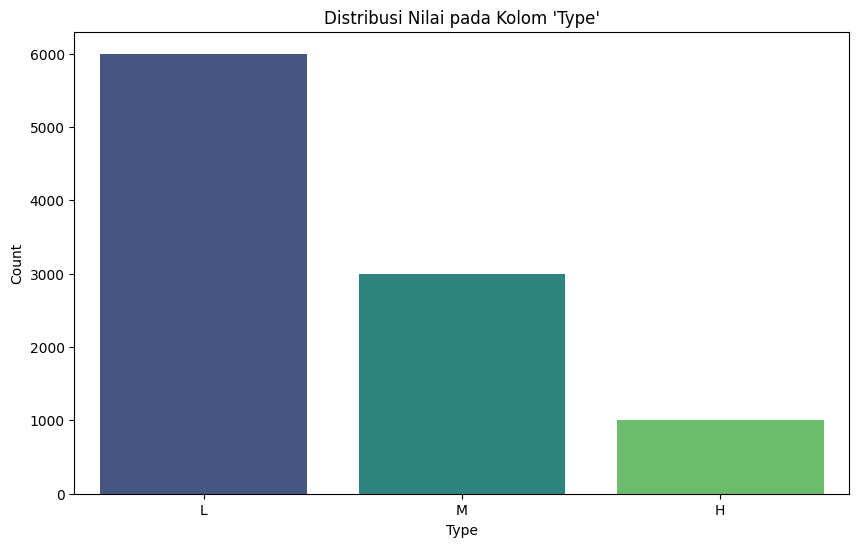

In [33]:
type_counts = data['Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis', hue=type_counts.index)
plt.title("Distribusi Nilai pada Kolom 'Type'")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## **1.7 Mendistribusikan Kegagalan Mesin Berdasarkan Type**

In [34]:
failure_counts = data.groupby(['Type', 'Machine failure']).size().reset_index(name='count')
print(failure_counts)

  Type  Machine failure  count
0    H                0    982
1    H                1     21
2    L                0   5765
3    L                1    235
4    M                0   2914
5    M                1     83


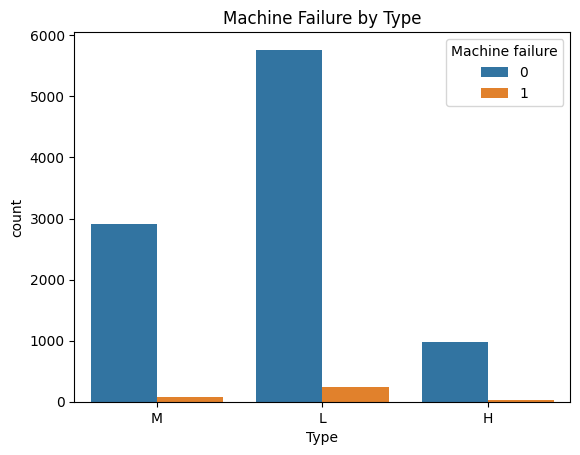

In [35]:
sns.countplot(x='Type', hue='Machine failure', data=data)
plt.title("Machine Failure by Type")
plt.show()

# **2. Persiapan Data untuk Model**

## **2.1 Pemisah Fitur dan Target**

In [36]:
X = data.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = data['Machine failure']

## **2.2 Preprocessing dan Pembentukan Model (KNeighbors & AdaBoost)**

In [37]:
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

ada_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

## **2.3 Pemisahan Data untuk Pelatihan dan Pengujian**

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## **2.4 Pelatihan Model KNeighbors**

In [39]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier', KNeighborsClassifier())])

## **2.5 Pelatihan Model AdaBoost**

In [40]:
ada_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

# **3. Hasil dan Evaluasi**

## **3.1 Fungsi Evaluasi Model**

In [41]:
def evaluate_model(model, X_val, y_val, X_test, y_test):
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print("Validation Set Classification Report:\n", classification_report(y_val, y_val_pred))
    print("Validation Set Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
    val_roc_auc = roc_auc_score(y_val, y_val_proba)
    print(f'\nValidation ROC-AUC score: {val_roc_auc} \n')

    print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Test Set Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    print(f'\nTest ROC-AUC score: {test_roc_auc} \n')

    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean()}')

## **3.2 Evaluasi Model Tanpa Tuning**

### **a. Model KNeighbors**

In [42]:
print("Evaluasi model KNeighbors tanpa tuning:")
evaluate_model(knn_model, X_val, y_val, X_test, y_test)

Evaluasi model KNeighbors tanpa tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.83      0.31      0.45        61

    accuracy                           0.98      2000
   macro avg       0.90      0.65      0.72      2000
weighted avg       0.97      0.98      0.97      2000

Validation Set Confusion Matrix:
 [[1935    4]
 [  42   19]]

Validation ROC-AUC score: 0.8922251625394195 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.80      0.29      0.43        68

    accuracy                           0.97      2000
   macro avg       0.89      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000

Test Set Confusion Matrix:
 [[1927    5]
 [  48   20]]

Test ROC-AUC score: 0.8597803251735476 

Cross-validation scores: [0.

### **b. Model AdaBoost**

In [43]:
print("Evaluasi model AdaBoost tanpa tuning:")
evaluate_model(ada_model, X_val, y_val, X_test, y_test)

Evaluasi model AdaBoost tanpa tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.59      0.52      0.56        61

    accuracy                           0.97      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.97      0.97      0.97      2000

Validation Set Confusion Matrix:
 [[1917   22]
 [  29   32]]

Validation ROC-AUC score: 0.9475266108100338 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1932
           1       0.70      0.41      0.52        68

    accuracy                           0.97      2000
   macro avg       0.84      0.70      0.75      2000
weighted avg       0.97      0.97      0.97      2000

Test Set Confusion Matrix:
 [[1920   12]
 [  40   28]]

Test ROC-AUC score: 0.9593571124101814 

Cross-validation scores: [0.97

# **4. Tuning Model**

In [44]:
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

param_grid_ada = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1, 10]
}

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)
grid_search_ada.fit(X_train, y_train)

print(f'Best parameters for KNN: {grid_search_knn.best_params_}')
print(f'Best parameters for AdaBoost: {grid_search_ada.best_params_}')

best_knn_model = grid_search_knn.best_estimator_
best_ada_model = grid_search_ada.best_estimator_

Best parameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Best parameters for AdaBoost: {'classifier__learning_rate': 1, 'classifier__n_estimators': 100}


## **4.1 Evaluasi Model dengan Tuning**

### **a. Model KNeighbors**

In [45]:
print("Evaluasi model KNeighbors dengan tuning:")
evaluate_model(best_knn_model, X_val, y_val, X_test, y_test)

Evaluasi model KNeighbors dengan tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.94      0.28      0.43        61

    accuracy                           0.98      2000
   macro avg       0.96      0.64      0.71      2000
weighted avg       0.98      0.98      0.97      2000

Validation Set Confusion Matrix:
 [[1938    1]
 [  44   17]]

Validation ROC-AUC score: 0.885389629604579 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.86      0.28      0.42        68

    accuracy                           0.97      2000
   macro avg       0.92      0.64      0.70      2000
weighted avg       0.97      0.97      0.97      2000

Test Set Confusion Matrix:
 [[1929    3]
 [  49   19]]

Test ROC-AUC score: 0.8880160759956157 

Cross-validation scores: [0.

### **b. Model AdaBoost**

In [46]:
print("Evaluasi model AdaBoost dengan tuning:")
evaluate_model(best_ada_model, X_val, y_val, X_test, y_test)

Evaluasi model AdaBoost dengan tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.63      0.56      0.59        61

    accuracy                           0.98      2000
   macro avg       0.81      0.77      0.79      2000
weighted avg       0.98      0.98      0.98      2000

Validation Set Confusion Matrix:
 [[1919   20]
 [  27   34]]

Validation ROC-AUC score: 0.9480803862054972 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1932
           1       0.71      0.43      0.53        68

    accuracy                           0.97      2000
   macro avg       0.84      0.71      0.76      2000
weighted avg       0.97      0.97      0.97      2000

Test Set Confusion Matrix:
 [[1920   12]
 [  39   29]]

Test ROC-AUC score: 0.9588851845085861 

Cross-validation scores: [0.9

# **5. Visualisasi Hasil Model**

## **5.1 ROC Curve**


ROC Curve for each model:


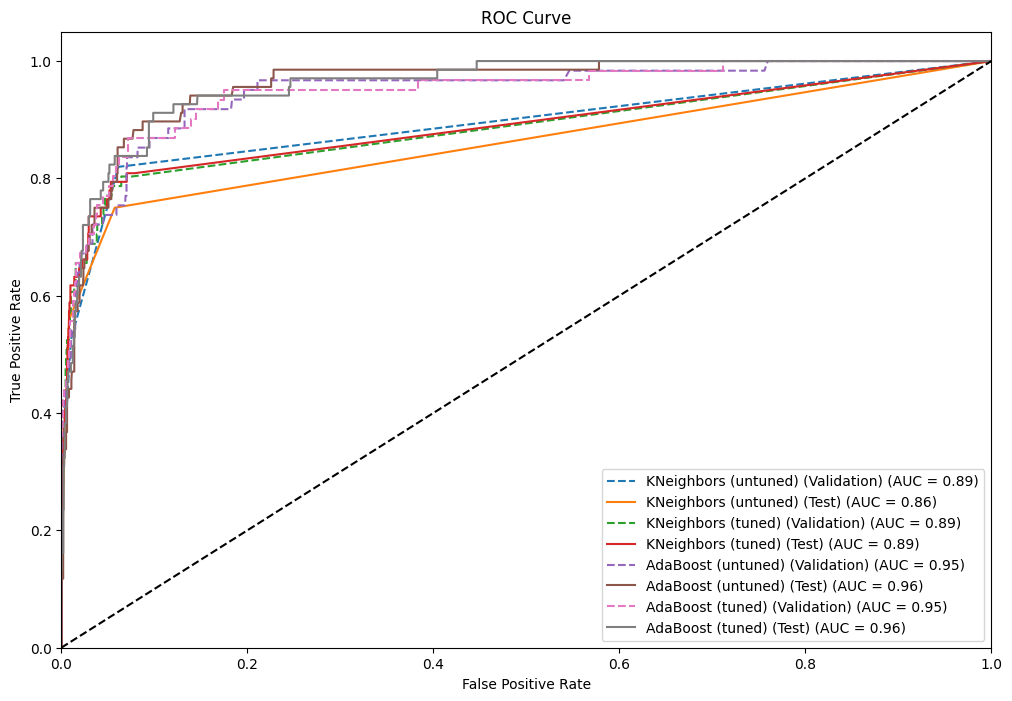

In [47]:
def plot_roc_curve(models, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_val_proba = model.predict_proba(X_val)[:, 1]
        fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
        roc_auc_val = auc(fpr_val, tpr_val)

        y_test_proba = model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)

        plt.plot(fpr_val, tpr_val, linestyle='--', label=f'{name} (Validation) (AUC = {roc_auc_val:.2f})')
        plt.plot(fpr_test, tpr_test, label=f'{name} (Test) (AUC = {roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

models = {
    'KNeighbors (untuned)': knn_model,
    'KNeighbors (tuned)': best_knn_model,
    'AdaBoost (untuned)': ada_model,
    'AdaBoost (tuned)': best_ada_model
}

print("\nROC Curve for each model:")
plot_roc_curve(models, X_val, y_val, X_test, y_test)

## **5.2 Precision-Recall Curve**


Precision-Recall Curve for each model:


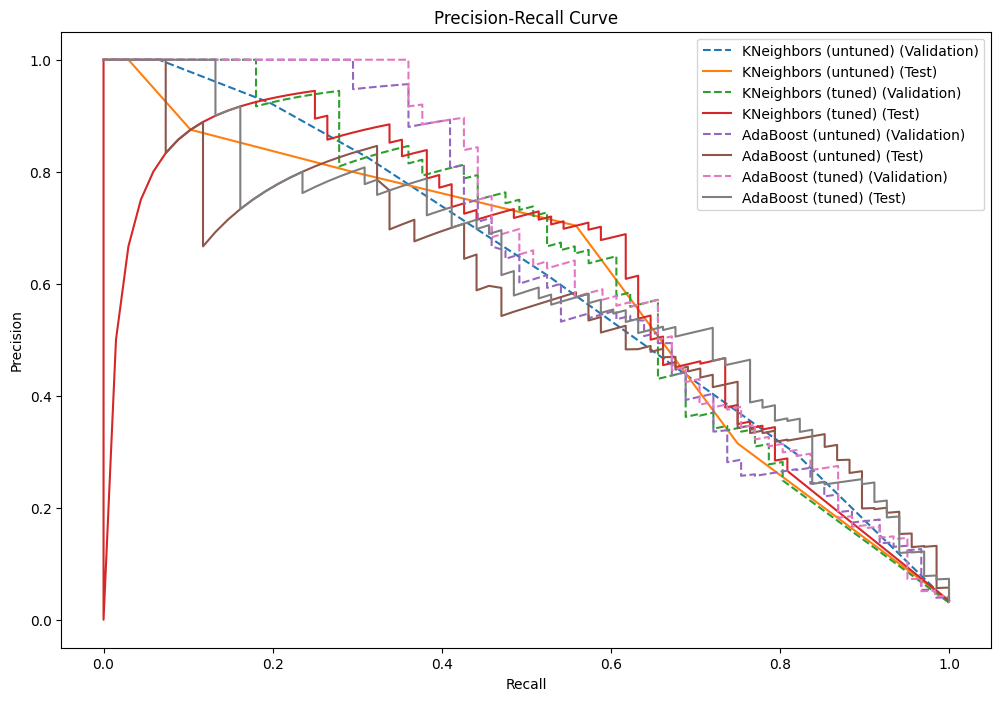

In [48]:
def plot_precision_recall_curve(models, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_val_proba = model.predict_proba(X_val)[:, 1]
        precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)

        y_test_proba = model.predict_proba(X_test)[:, 1]
        precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

        plt.plot(recall_val, precision_val, linestyle='--', label=f'{name} (Validation)')
        plt.plot(recall_test, precision_test, label=f'{name} (Test)')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

print("\nPrecision-Recall Curve for each model:")
plot_precision_recall_curve(models, X_val, y_val, X_test, y_test)

# **6. Hasil Analisis dan Kesimpulan**

## **6.1 Hasil Analisis Tanpa Tuning**

### **a. Model KNeighbors**

- **Validation Set:**
  - Precision untuk kelas 0: 0.98
  - Recall untuk kelas 0: 1.00
  - Precision untuk kelas 1: 0.83
  - Recall untuk kelas 1: 0.31
  - Akurasi: 0.98
  - Macro average F1-score: 0.72
  - Weighted average F1-score: 0.97
  - ROC-AUC score: 0.8922
- **Test Set:**
  - Precision untuk kelas 0: 0.98
  - Recall untuk kelas 0: 1.00
  - Precision untuk kelas 1: 0.80
  - Recall untuk kelas 1: 0.29
  - Akurasi: 0.97
  - Macro average F1-score: 0.71
  - Weighted average F1-score: 0.97
  - ROC-AUC score: 0.8598
- **Cross-validation:**
  - Scores: [0.971, 0.972, 0.8695, 0.964, 0.975]
  - Mean score: 0.9503

- **Hasil:**
  - Model menunjukkan performa yang sangat baik untuk kelas 0 namun kurang baik untuk kelas 1, terutama pada recall. Hal ini terlihat dari precision dan recall untuk kelas 1 yang rendah.
  - Cross-validation menunjukkan variabilitas yang tinggi, yang mengindikasikan model mungkin tidak stabil pada data yang berbeda.

### **b. Model AdaBoost**

- **Validation Set:**
  - Precision untuk kelas 0: 0.99
  - Recall untuk kelas 0: 0.99
  - Precision untuk kelas 1: 0.59
  - Recall untuk kelas 1: 0.52
  - Akurasi: 0.97
  - Macro average F1-score: 0.77
  - Weighted average F1-score: 0.97
  - ROC-AUC score: 0.9475
- **Test Set:**
  - Precision untuk kelas 0: 0.98
  - Recall untuk kelas 0: 0.99
  - Precision untuk kelas 1: 0.70
  - Recall untuk kelas 1: 0.41
  - Akurasi: 0.97
  - Macro average F1-score: 0.75
  - Weighted average F1-score: 0.97
  - ROC-AUC score: 0.9594
- **Cross-validation:**
  - Scores: [0.974, 0.9715, 0.5175, 0.9645, 0.975]
  - Mean score: 0.8805
- **Hasil:**
  - Model menunjukkan performa yang sangat baik untuk kelas 0 namun kurang baik untuk kelas 1, terutama pada recall. Precision dan recall untuk kelas 1 masih rendah.
  - Variabilitas menunjukkan variabilitas yang tinggi, mengindikasikan model mungkin tidak stabil pada data yang berbeda.


## **6.2 Hasil Analisis Dengan Tuning**

### **a. Model KNeighbors**

- **Validation Set:**
  - Precision untuk kelas 0: 0.98
  - Recall untuk kelas 0: 1.00
  - Precision untuk kelas 1: 0.94
  - Recall untuk kelas 1: 0.28
  - Akurasi: 0.98
  - Macro average F1-score: 0.71
  - Weighted average F1-score: 0.97
  - ROC-AUC score: 0.8854
- **Test Set:**
  - Precision untuk kelas 0: 0.98
  - Recall untuk kelas 0: 1.00
  - Precision untuk kelas 1: 0.86
  - Recall untuk kelas 1: 0.28
  - Akurasi: 0.97
  - Macro average F1-score: 0.70
  - Weighted average F1-score: 0.97
  - ROC-AUC score: 0.8880
- **Cross-validation:**
  - Scores: [0.97, 0.968, 0.891, 0.966, 0.9755]
  - Mean score: 0.9541

- **Hasil:**
  - Setelah tuning, performa model Random Forest meningkat sedikit, terutama pada recall kelas 1.
  - Meskipun tuning memperbaiki beberapa aspek, variabilitas cross-validation masih tinggi.

### **b. Model AdaBoost**

- **Validation Set:**
  - Precision untuk kelas 0: 0.99
  - Recall untuk kelas 0: 0.99
  - Precision untuk kelas 1: 0.63
  - Recall untuk kelas 1: 0.56
  - Akurasi: 0.98
  - Macro average F1-score: 0.79
  - Weighted average F1-score: 0.98
  - ROC-AUC score: 0.9481
- **Test Set:**
  - Precision untuk kelas 0: 0.98
  - Recall untuk kelas 0: 0.99
  - Precision untuk kelas 1: 0.71
  - Recall untuk kelas 1: 0.43
  - Akurasi: 0.97
  - Macro average F1-score: 0.76
  - Weighted average F1-score: 0.97
  - ROC-AUC score: 0.9589
- **Cross-validation:**
  - Scores: [0.9715, 0.9695, 0.513, 0.9685, 0.9735]
  - Mean score: 0.8792
- **Hasil:**
  - Model menunjukkan sedikit peningkatan pada precision dan recall untuk kelas 1. Tuning membantu meningkatkan performa kelas 1 meskipun recall masih relatif rendah.
  - Cross-validation rata-rata sedikit meningkat dibandingkan tanpa tuning, tetapi variabilitas tetap ada, menunjukkan bahwa tuning tidak secara signifikan meningkatkan stabilitas model.



## **6.3 Kesimpulan**

**AdaBoost Tanpa Tuning:**
- Model ini menunjukkan performa yang sangat baik dalam memprediksi kelas mayoritas (0) dengan precision dan recall yang tinggi (0.99). Namun, performa dalam memprediksi kelas minoritas (1) masih kurang baik, dengan precision 0.59 dan recall 0.52 pada validation set, serta precision 0.70 dan recall 0.41 pada test set.
- ROC-AUC score untuk validation set adalah 0.9475 dan untuk test set adalah 0.9594, yang menunjukkan kemampuan model dalam membedakan antara kedua kelas cukup baik.
- Variabilitas cross-validation tinggi, dengan scores [0.974, 0.9715, 0.5175, 0.9645, 0.975] dan mean score 0.8805, menunjukkan performa model yang tidak stabil pada data yang berbeda.

**KNeighbors Tanpa Tuning:**
- Model KNeighbors juga menunjukkan performa yang sangat baik dalam memprediksi kelas mayoritas (0), namun precision dan recall untuk kelas minoritas (1) lebih rendah dibandingkan AdaBoost. Precision untuk kelas 1 adalah 0.83 dan recall 0.31 pada validation set, serta precision 0.80 dan recall 0.29 pada test set.
- ROC-AUC score untuk KNeighbors adalah 0.8922 pada validation set dan 0.8598 pada test set, lebih rendah dibandingkan dengan AdaBoost.
- Variabilitas cross-validation juga tinggi, dengan scores [0.971, 0.972, 0.8695, 0.964, 0.975] dan mean score 0.9503, menunjukkan bahwa KNeighbors memiliki performa rata-rata yang lebih baik meskipun dengan variabilitas yang tinggi.

**AdaBoost dengan Tuning:**
- Setelah tuning, performa AdaBoost meningkat sedikit dalam memprediksi kelas minoritas (1), dengan precision 0.63 dan recall 0.56 pada validation set, serta precision 0.71 dan recall 0.43 pada test set.
- ROC-AUC score untuk validation set adalah 0.9481 dan untuk test set adalah 0.9589, menunjukkan sedikit peningkatan dibandingkan tanpa tuning.
- Variabilitas cross-validation tetap ada, dengan scores [0.9715, 0.9695, 0.513, 0.9685, 0.9735] dan mean score 0.8792, menunjukkan bahwa tuning tidak secara signifikan meningkatkan stabilitas model.

**KNeighbors dengan Tuning:**
- Performa dalam memprediksi kelas mayoritas (0) sangat baik, dengan precision dan recall yang tinggi (0.98 dan 1.00).
- Performa dalam memprediksi kelas minoritas (1) meningkat sedikit setelah tuning, dengan precision 0.94 dan recall 0.28 pada validation set, serta precision 0.86 dan recall 0.28 pada test set.
- ROC-AUC score untuk validation set adalah 0.8854 dan untuk test set adalah 0.8880.
- Cross-validation menunjukkan skor [0.97, 0.968, 0.891, 0.966, 0.9755] dan mean score 0.9541, yang menunjukkan bahwa tuning sedikit meningkatkan stabilitas model.

# **7. Rekomendasi**

- **AdaBoost dengan Tuning** adalah pilihan terbaik karena menunjukkan performa yang lebih baik dalam memprediksi kelas minoritas (1) dibandingkan model lainnya. Dengan precision 0.63 dan recall 0.56 pada validation set, serta precision 0.71 dan recall 0.43 pada test set, AdaBoost dengan tuning memberikan keseimbangan yang lebih baik antara kedua kelas. Variabilitas cross-validation juga sedikit berkurang setelah tuning, menunjukkan stabilitas yang lebih baik dibandingkan tanpa tuning.

- Jika Anda membutuhkan model yang lebih cepat, KNeighbors dengan tuning bisa menjadi pilihan alternatif. Meskipun performa dalam memprediksi kelas minoritas (1) sedikit di bawah AdaBoost dengan tuning, model ini menunjukkan peningkatan stabilitas setelah tuning dengan mean cross-validation score 0.9541. Precision untuk kelas minoritas (1) meningkat menjadi 0.94 pada validation set dan 0.86 pada test set, meskipun recall tetap rendah.
